In [1]:
fname = 'data\\from-azure\\mapf_dims_64_epochs_3_lr_0.1_embeddings.txt'
label_fname = 'data\\from-azure\\mapf.Labels'

In [286]:
import pandas as pd

df = pd.read_csv('data/from-azure/nathan_AllData-labelled.csv')
X_train, X_test, y_train, y_test = train_test_split(df, df['Y'], test_size=0.3)

In [282]:
def coverage_score(df, preds):
    solved = 0
    for pred, (index, row) in zip(preds,df.iterrows()):
        if(row[pred] < 300000):
              solved += 1
    return solved/len(df)

def cumsum_score(df, preds):
    cumsum = 0
    for pred, (index, row) in zip(preds,df.iterrows()):
        cumsum += row[pred]
    return cumsum/((60*(10**3)))


In [283]:
conversions = {
        0 : 'EPEA*+ID Runtime',
        1 : 'MA-CBS-Global-10/(EPEA*/SIC) choosing the first conflict in CBS nodes Runtime',
        2 : 'ICTS 3E +ID Runtime',
        3 : 'A*+OD+ID Runtime',
        4 : 'Basic-CBS/(A*/SIC)+ID Runtime'
    }

import numpy as np
from sklearn.metrics import accuracy_score

random_preds = [conversions[x] for x in np.random.randint(0, 5, size=(len(X_test)))]
random_baseline = accuracy_score(y_test, random_preds)
print("Choosing Random accuracy:",random_baseline)
print("Choosing Random coverage:",coverage_score(X_test, random_preds))
print("Choosing Random cumsum:",cumsum_score(X_test, random_preds))
for key, conversion in conversions.items():
    preds =  [conversion] * len(X_test)
    print("Choosing", conversion,"accuracy:",accuracy_score(y_test,preds))
    print("Choosing", conversion,"coverage:",coverage_score(X_test, preds))
    print("Choosing", conversion,"cumsum:",cumsum_score(X_test, preds))

Choosing Random accuracy: 0.18878718535469108
Choosing Random coverage: 0.8152173913043478
Choosing Random cumsum: 1878.8006203700024
Choosing EPEA*+ID Runtime accuracy: 0.12929061784897025
Choosing EPEA*+ID Runtime coverage: 0.8804347826086957
Choosing EPEA*+ID Runtime cumsum: 1272.9323684466585
Choosing MA-CBS-Global-10/(EPEA*/SIC) choosing the first conflict in CBS nodes Runtime accuracy: 0.5440503432494279
Choosing MA-CBS-Global-10/(EPEA*/SIC) choosing the first conflict in CBS nodes Runtime coverage: 0.6807780320366132
Choosing MA-CBS-Global-10/(EPEA*/SIC) choosing the first conflict in CBS nodes Runtime cumsum: 3033.8224076866773
Choosing ICTS 3E +ID Runtime accuracy: 0.17448512585812356
Choosing ICTS 3E +ID Runtime coverage: 0.8901601830663616
Choosing ICTS 3E +ID Runtime cumsum: 1202.1575393549995
Choosing A*+OD+ID Runtime accuracy: 0.05034324942791762
Choosing A*+OD+ID Runtime coverage: 0.8598398169336384
Choosing A*+OD+ID Runtime cumsum: 1489.7082657499984
Choosing Basic-CBS/

In [284]:
def round_up_to_5(num):
    return str(5 - (int(num) % 5) + int(num))

def obstacle_density_to_num(density):
    if density=='0.0':
        return 0
    density = density.split('.')[1]
    if len(density) > 2:
        return round_up_to_5(density[:2])
    elif density[0] == '0':
        return density[1:]
    elif len(density) == 1:
        return density+'0'

    return density


In [5]:
def file_name_from(row):
    if row.GridName == 'Unknown':
        data = ['Instance',row.GridRows, obstacle_density_to_num(str(row.ObstacleDensity)), row.NumOfAgents, row.InstanceId]
        line = '-'.join(map(str, data)) + '.gexf' 
    else:
        data = [row.GridName, str(row.NumOfAgents), str(row.InstanceId)]
        line = '-'.join(map(str,data)) +'.gexf' 
    return line

In [66]:

mapf_file='Instance-20-10-20-4.gexf'
G = nx.read_gexf('edgelists/AllData/'+mapf_file)


C:\Users\omri\AppData\Roaming\Python\Python36\site-packages\graphrole\roles\description_length.py:56: RuntimeWarning: divide by zero encountered in log
  kl_div = np.sum(np.where(vec1 != 0, vec1 * np.log(vec1 / vec2) - vec1 + vec2, 0))
C:\Users\omri\AppData\Roaming\Python\Python36\site-packages\graphrole\roles\description_length.py:56: RuntimeWarning: invalid value encountered in multiply
  kl_div = np.sum(np.where(vec1 != 0, vec1 * np.log(vec1 / vec2) - vec1 + vec2, 0))
C:\Users\omri\AppData\Roaming\Python\Python36\site-packages\graphrole\roles\description_length.py:56: RuntimeWarning: divide by zero encountered in log
  kl_div = np.sum(np.where(vec1 != 0, vec1 * np.log(vec1 / vec2) - vec1 + vec2, 0))
C:\Users\omri\AppData\Roaming\Python\Python36\site-packages\graphrole\roles\description_length.py:56: RuntimeWarning: invalid value encountered in multiply
  kl_div = np.sum(np.where(vec1 != 0, vec1 * np.log(vec1 / vec2) - vec1 + vec2, 0))
C:\Users\omri\AppData\Roaming\Python\Python36\si

C:\Users\omri\AppData\Roaming\Python\Python36\site-packages\graphrole\roles\description_length.py:56: RuntimeWarning: divide by zero encountered in log
  kl_div = np.sum(np.where(vec1 != 0, vec1 * np.log(vec1 / vec2) - vec1 + vec2, 0))
C:\Users\omri\AppData\Roaming\Python\Python36\site-packages\graphrole\roles\description_length.py:56: RuntimeWarning: invalid value encountered in multiply
  kl_div = np.sum(np.where(vec1 != 0, vec1 * np.log(vec1 / vec2) - vec1 + vec2, 0))
C:\Users\omri\AppData\Roaming\Python\Python36\site-packages\graphrole\roles\description_length.py:56: RuntimeWarning: divide by zero encountered in log
  kl_div = np.sum(np.where(vec1 != 0, vec1 * np.log(vec1 / vec2) - vec1 + vec2, 0))
C:\Users\omri\AppData\Roaming\Python\Python36\site-packages\graphrole\roles\description_length.py:56: RuntimeWarning: invalid value encountered in multiply
  kl_div = np.sum(np.where(vec1 != 0, vec1 * np.log(vec1 / vec2) - vec1 + vec2, 0))
C:\Users\omri\AppData\Roaming\Python\Python36\si

C:\Users\omri\AppData\Roaming\Python\Python36\site-packages\graphrole\roles\description_length.py:56: RuntimeWarning: divide by zero encountered in log
  kl_div = np.sum(np.where(vec1 != 0, vec1 * np.log(vec1 / vec2) - vec1 + vec2, 0))
C:\Users\omri\AppData\Roaming\Python\Python36\site-packages\graphrole\roles\description_length.py:56: RuntimeWarning: invalid value encountered in multiply
  kl_div = np.sum(np.where(vec1 != 0, vec1 * np.log(vec1 / vec2) - vec1 + vec2, 0))
C:\Users\omri\AppData\Roaming\Python\Python36\site-packages\graphrole\roles\description_length.py:56: RuntimeWarning: divide by zero encountered in log
  kl_div = np.sum(np.where(vec1 != 0, vec1 * np.log(vec1 / vec2) - vec1 + vec2, 0))
C:\Users\omri\AppData\Roaming\Python\Python36\site-packages\graphrole\roles\description_length.py:56: RuntimeWarning: invalid value encountered in multiply
  kl_div = np.sum(np.where(vec1 != 0, vec1 * np.log(vec1 / vec2) - vec1 + vec2, 0))
C:\Users\omri\AppData\Roaming\Python\Python36\si

{'0': 'role_2',
 '1': 'role_4',
 '10': 'role_4',
 '100': 'role_0',
 '101': 'role_0',
 '102': 'role_3',
 '103': 'role_1',
 '104': 'role_1',
 '105': 'role_1',
 '106': 'role_3',
 '107': 'role_0',
 '108': 'role_0',
 '109': 'role_2',
 '11': 'role_4',
 '110': 'role_1',
 '111': 'role_1',
 '112': 'role_1',
 '113': 'role_1',
 '114': 'role_1',
 '115': 'role_2',
 '116': 'role_1',
 '117': 'role_0',
 '118': 'role_4',
 '119': 'role_4',
 '12': 'role_6',
 '120': 'role_4',
 '121': 'role_3',
 '122': 'role_1',
 '123': 'role_3',
 '124': 'role_1',
 '125': 'role_0',
 '126': 'role_0',
 '127': 'role_3',
 '128': 'role_0',
 '129': 'role_1',
 '13': 'role_0',
 '130': 'role_1',
 '131': 'role_1',
 '132': 'role_1',
 '133': 'role_1',
 '134': 'role_6',
 '135': 'role_0',
 '136': 'role_4',
 '137': 'role_0',
 '138': 'role_3',
 '139': 'role_4',
 '14': 'role_4',
 '140': 'role_0',
 '141': 'role_1',
 '142': 'role_3',
 '143': 'role_0',
 '144': 'role_0',
 '145': 'role_4',
 '146': 'role_4',
 '147': 'role_1',
 '148': 'role_1',
 

In [69]:
set(node_roles.values())

{'role_0', 'role_1', 'role_2', 'role_3', 'role_4', 'role_6', 'role_7'}

In [50]:
import networkx as nx
from sklearn import manifold

embeds = []
# for mapf_file in df['mapf_file'].values[5510:5550]:
#     print(mapf_file)
mapf_file='Instance-90-20-70-0.gexf'
exam_g = nx.read_gexf('edgelists/AllData/'+mapf_file)
W = nx.adjacency_matrix(exam_g)
#     L = nx.laplacian_matrix(nx.to_undirected(exam_g))
n_neighbors = 10 

# Set the dimension of the target space. 
n_components = 2

# Construct the SpectralEmbedding object. 
# se = manifold.SpectralEmbedding(n_components=n_components,
#                                 affinity= 'nearest_neighbors',
#                                 n_neighbors=n_neighbors)

# Fit the SpectralEmbedding object. 
# embed = se.fit_transform(W.todense())
# embeds.append(embed)


kiva_0-5-2.gexf
kiva_0-5-3.gexf
kiva_0-5-4.gexf
kiva_0-5-5.gexf
kiva_0-5-6.gexf
kiva_0-5-7.gexf
kiva_0-5-8.gexf
kiva_0-5-9.gexf
kiva_0-10-0.gexf
kiva_0-10-1.gexf
kiva_0-10-2.gexf
kiva_0-10-3.gexf
kiva_0-10-4.gexf
kiva_0-10-5.gexf
kiva_0-10-6.gexf
kiva_0-10-7.gexf
kiva_0-10-8.gexf
kiva_0-10-9.gexf
kiva_0-15-0.gexf
kiva_0-15-1.gexf
kiva_0-15-2.gexf
kiva_0-15-3.gexf
kiva_0-15-4.gexf
kiva_0-15-5.gexf
kiva_0-15-6.gexf
kiva_0-15-7.gexf
kiva_0-15-8.gexf
kiva_0-15-9.gexf
kiva_0-20-0.gexf
kiva_0-20-1.gexf
kiva_0-20-2.gexf
kiva_0-20-3.gexf
kiva_0-20-4.gexf
kiva_0-20-5.gexf
kiva_0-20-6.gexf
kiva_0-20-7.gexf
kiva_0-20-8.gexf
kiva_0-20-9.gexf
kiva_0-25-0.gexf
kiva_0-25-1.gexf


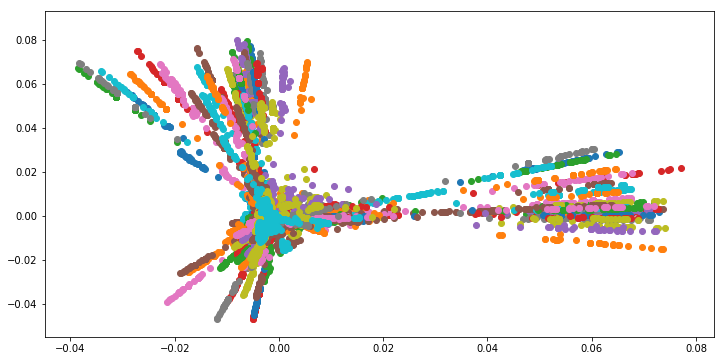

In [58]:

import matplotlib.pyplot as plt
%matplotlib inline
# Visualize the result.
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
for embed in embeds:
    ax.scatter(embed[:, 0], embed[:, 1]);

In [27]:
nx.adjacency_matrix(exam_g)

<3600x3600 sparse matrix of type '<class 'numpy.float64'>'
	with 14160 stored elements in Compressed Sparse Row format>

In [6]:
df['mapf_file'] = df.apply(lambda x: file_name_from(x),axis=1)

In [7]:
mapf_df = pd.read_csv(label_fname,delim_whitespace=True, header=None, names=['mapf_file','label','embedding'], )

In [8]:
import json
with open(fname,'r') as fh:
    graph_embedding_dict = json.load(fh)

In [9]:
graph_embedding_dict = dict([(k.split('\\')[4].split('.g2v3')[0],v) for k,v in graph_embedding_dict.items()])

In [72]:
mapf_df = mapf_df.merge(df, on=['mapf_file'])

In [11]:
def embedding_for(file):
    if file in graph_embedding_dict:
        embedding = graph_embedding_dict[file]
    else:
        embedding =  [0]*64
    embedding = np.array(embedding)
    return embedding

In [12]:
import numpy as np
embedding_cols = ['embedding'+str(x) for x in range(1,65)]
train_word2vec_df=pd.DataFrame([[k]+v for k,v in graph_embedding_dict.items()],columns=['mapf_file'] + embedding_cols)

In [13]:
merged_df = mapf_df.merge(train_word2vec_df, on=['mapf_file'])

In [14]:
conversions = {
        0 : 'EPEA*+ID Runtime',
        1 : 'MA-CBS-Global-10/(EPEA*/SIC) choosing the first conflict in CBS nodes Runtime',
        2 : 'ICTS 3E +ID Runtime',
        3 : 'A*+OD+ID Runtime',
        4 : 'Basic-CBS/(A*/SIC)+ID Runtime'
    }

In [15]:
def suffix_from_label(label):
    return {
        'EPEA*+ID Runtime': 0,
        'MA-CBS-Global-10/(EPEA*/SIC) choosing the first conflict in CBS nodes Runtime':1,
        'ICTS 3E +ID Runtime':2,
        'A*+OD+ID Runtime':3,
        'Basic-CBS/(A*/SIC)+ID Runtime':4
    }[label]

In [16]:
merged_df['label'] =merged_df.apply(lambda x: conversions[x['label']], axis=1)

In [17]:
def func(x):
    return np.log1p(x)
def inverse_func(x):
    return np.expm1(x)

In [18]:
runtime_cols = ['EPEA*+ID Runtime',
                'MA-CBS-Global-10/(EPEA*/SIC) choosing the first conflict in CBS nodes Runtime',
                'ICTS 3E +ID Runtime',
                'A*+OD+ID Runtime',
                'Basic-CBS/(A*/SIC)+ID Runtime',
                'Y Runtime']

alg_runtime_cols = runtime_cols.copy()
if 'P Runtime' in alg_runtime_cols:
    alg_runtime_cols.remove('P Runtime')
    
only_alg_runtime_cols = alg_runtime_cols.copy()
only_alg_runtime_cols.remove('Y Runtime')

In [274]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(merged_df, merged_df['label'], test_size=0.3)

In [20]:
train_samples_weight = X_train.apply(lambda x: np.log10(np.std(x[only_alg_runtime_cols].values)), axis=1)

In [25]:
from sklearn.compose import TransformedTargetRegressor
import xgboost as xgb

xg_regs = []
regs_data = []
index = 0
for runtime_col in runtime_cols:
    if 'P Runtime' in runtime_col or 'Y Runtime' in runtime_col:
        continue
    print(index,":",runtime_col)
    index += 1
    regs_data.append([X_train[embedding_cols + features_cols],X_test[embedding_cols + features_cols], X_train[runtime_col], X_test[runtime_col]])
    xg_reg = xgb.XGBRegressor(objective ='reg:linear', min_child_weight=0.5, colsample_bytree = 0.8, learning_rate = 0.1
                              , max_depth = 3,alpha = 10, n_estimators = 75)#, colsample_bylevel= 0.5, colsample_bynode = 0.5)
    xg_reg_trans = TransformedTargetRegressor(regressor=xg_reg, func=func, inverse_func=inverse_func)
    
    xg_reg_trans.fit(X_train[embedding_cols + features_cols], X_train[runtime_col],sample_weight=train_samples_weight )
    
    xg_regs.append(xg_reg_trans)



0 : EPEA*+ID Runtime


c:\users\omri\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


1 : MA-CBS-Global-10/(EPEA*/SIC) choosing the first conflict in CBS nodes Runtime


c:\users\omri\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


2 : ICTS 3E +ID Runtime


c:\users\omri\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


3 : A*+OD+ID Runtime


c:\users\omri\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


4 : Basic-CBS/(A*/SIC)+ID Runtime


c:\users\omri\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [26]:
import numpy as np

from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error

rmses = []
for xg_reg, reg_data in zip(xg_regs, regs_data):
    print("test label mean", np.std(reg_data[3]))
    reg_train_preds = xg_reg.predict(reg_data[0])
    reg_test_preds = xg_reg.predict(reg_data[1])
    print("Train acc:",np.sqrt(mean_squared_error(reg_data[2], reg_train_preds)))
    rmses.append(np.sqrt(mean_squared_error(reg_data[3], reg_test_preds)))
    print("Test acc:",np.sqrt(mean_squared_error(reg_data[3], reg_test_preds)))


test label mean 97307.08591638254
Train acc: 77171.33264457331
Test acc: 84501.14511965703
test label mean 138068.2236956523
Train acc: 108320.18617880833
Test acc: 113753.34397139114
test label mean 92234.26798180188
Train acc: 74186.80777722644
Test acc: 78100.55841967574
test label mean 102912.54881557707
Train acc: 80786.58377936398
Test acc: 88088.02446289654
test label mean 118675.30816664634
Train acc: 109338.4444309914
Test acc: 108661.01199823698


[417605.6, 422122.62, 750958.56, 469491.78, 453901.47, 472575.62, 300077.16, 322114.0, 596518.5, 604688.56, 513697.66, 484250.5, 354306.6, 553329.6, 314005.62] EPEA*+ID Runtime
[341575.28, 341193.4, 413848.66, 327581.84, 589131.0, 301410.84, 316506.12, 304968.16, 328886.25, 354417.1, 434939.1, 371332.47, 426712.5, 333952.38, 337135.72, 303327.6, 318016.84, 323139.5, 331069.88, 348083.16, 305532.9, 389209.2, 340837.6, 321414.38, 365986.4, 308549.22, 321244.6, 357646.78, 323121.03, 382467.88, 313595.3, 342606.22, 330840.1, 410208.1, 308341.8, 340411.1, 308953.2, 378877.8, 352597.28, 331434.12, 317521.34, 398274.16, 332067.84, 303120.25, 431949.62, 444870.12, 307560.9, 378140.7, 354835.12, 491068.78, 307951.28, 352364.3, 389804.66, 307526.6, 378565.38, 338656.72, 371279.72, 481525.16, 468176.8, 410725.97, 374637.34, 385307.0, 315432.2, 317136.1, 422334.4, 371149.44, 309562.8, 341347.66, 365656.03, 357625.97, 465456.25, 447755.94, 423809.53, 332818.9, 466541.5, 379749.25, 347433.78, 356888

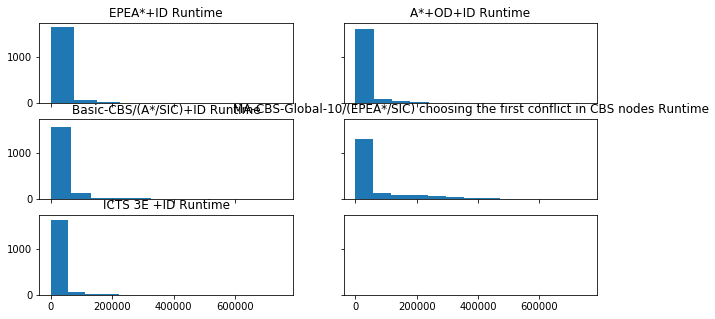

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(10,5))
index =0

for xg_reg, reg_data in zip(xg_regs, regs_data):
    reg_test_preds = xg_reg.predict(reg_data[1])
    print([p for p in reg_test_preds if p > 300000], conversions[index])
    axes[index%3][index%2].hist(reg_test_preds)
    axes[index%3][index%2].set_title(conversions[index])
    index += 1

In [32]:
from sklearn.metrics import accuracy_score

xg_test_res = []
xg_train_res = []
xg_y = []
for xg_reg in xg_regs:
    xg_test_res.append(np.array(xg_reg.predict(X_test[embedding_cols + features_cols])))
    xg_train_res.append(np.array(xg_reg.predict(X_train[embedding_cols + features_cols])))
xg_test_res = np.array(xg_test_res)
xg_train_res = np.array(xg_train_res)

# print(xg_res.argmin(axis=0)[:4], xg_res[:,:4]) #SANITY CHECK

train_preds = [conversions[index] for index in xg_train_res.argmin(axis=0)]
test_preds = [conversions[index] for index in xg_test_res.argmin(axis=0)]
print("Regressors argmax Train acc:",accuracy_score(y_train, train_preds))
print("Regressors argmax Test acc:",accuracy_score(y_test, test_preds ))
print("Regressors argmax Test coverage:", coverage_score(X_test, test_preds))
print("Regressors argmax Test cumsum:", cumsum_score(X_test, test_preds))

Regressors argmax Train acc: 0.5452538631346578
Regressors argmax Test acc: 0.4868421052631579
Regressors argmax Test coverage: 0.8752860411899314
Regressors argmax Test cumsum: 1335.0602216516695


In [288]:
features_cols = ['GridSize', 'NumOfObstacles',
            'AvgDistanceToGoal', 'MaxDistanceToGoal', 'MinDistanceToGoal', 'AvgStartDistances', 'AvgGoalDistances',
            'NumOfAgents', 'ObstacleDensity', 'PointsAtSPRatio', 'Sparsity']

In [34]:



xg_cls = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.01)
xg_cls.fit(X_train[embedding_cols + features_cols], y_train, sample_weight=train_samples_weight)


c:\users\omri\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [35]:
train_preds = xg_cls.predict(X_train[embedding_cols + features_cols])
test_preds = xg_cls.predict(X_test[embedding_cols + features_cols])

In [36]:

print("Train acc:",accuracy_score(y_train, train_preds))
print("Test acc:",accuracy_score(y_test, test_preds))

print("Train coverage:", coverage_score(X_train, train_preds))
print("Test coverage:", coverage_score(X_test, test_preds))

print("Train cumsum:", cumsum_score(X_train, train_preds))
print("Test cumsum:", cumsum_score(X_test, test_preds))

Train acc: 0.6951189600196223
Test acc: 0.5778032036613272
Train coverage: 0.8572479764532744
Test coverage: 0.8266590389016019
Train cumsum: 3482.0758899700054
Test cumsum: 1753.435778278339


In [302]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, perplexity=30, n_iter=5000,learning_rate=50).fit_transform(X_train[features_cols])

In [303]:
def color_from_label(label):
    return {
        'EPEA*+ID Runtime': 'blue',
        'MA-CBS-Global-10/(EPEA*/SIC) choosing the first conflict in CBS nodes Runtime':'red',
        'ICTS 3E +ID Runtime':'green',
        'A*+OD+ID Runtime':'brown',
        'Basic-CBS/(A*/SIC)+ID Runtime':'grey'
    }[label]

colors = [color_from_label(x) for x in X_train['Y']]

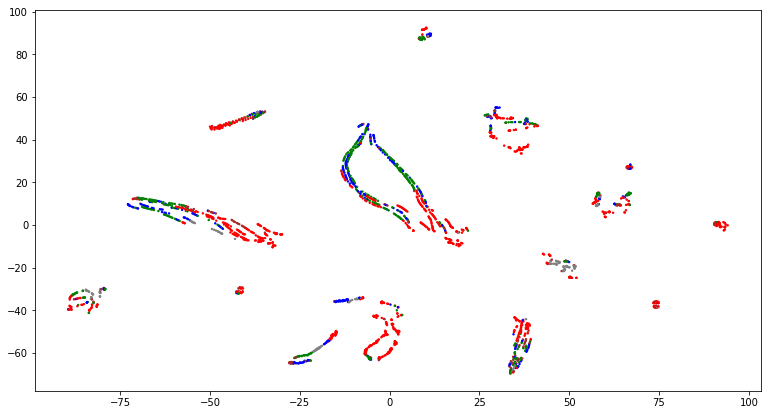

In [304]:

%matplotlib inline
plt.figure(figsize=(13,7))

x_coords = X_embedded[:, 0]
y_coords = X_embedded[:, 1]
# display scatter plot
plt.scatter(x_coords, y_coords, color=colors, s=2)
# for label, x, y in zip(X_train['Y'].values, x_coords, y_coords):
#     plt.annotate(suffix_from_label(label), xy=(x, y), xytext=(0, 0), fontsize=8)
    

In [220]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=0.3, min_samples=20).fit(X_train[embedding_cols])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [221]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_train, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_train, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_train, labels,
                                           average_method='arithmetic'))


Estimated number of clusters: 0
Estimated number of noise points: 4077
Homogeneity: -0.000
Completeness: 1.000
V-measure: -0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000


In [255]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_train[embedding_cols])

In [256]:
labels = kmeans.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_train, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_train, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_train, labels,
                                           average_method='arithmetic'))

Homogeneity: 0.046
Completeness: 0.039
V-measure: 0.042
Adjusted Rand Index: 0.012
Adjusted Mutual Information: 0.041


In [260]:
from sklearn.cluster import KMeans
pca = PCA(n_components=5).fit(X_train[embedding_cols])
kmeans = KMeans(init=pca.components_, n_clusters=5, random_state=0).fit(X_train[embedding_cols])

c:\users\omri\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [261]:
labels = kmeans.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_train, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_train, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y_train, labels,
                                           average_method='arithmetic'))

Homogeneity: 0.048
Completeness: 0.043
V-measure: 0.045
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.044


In [125]:
kmeans_preds = [conversions[p] for p in kmeans.predict(X_test[embedding_cols])]
accuracy_score(kmeans_preds, y_test)
print("Kmeans coverage:", coverage_score(X_test, kmeans_preds))


Kmeans coverage: 0.835812356979405


In [44]:
def replace_label_with_int(x):
    return {
        'EPEA*+ID Runtime': 0,
        'MA-CBS-Global-10/(EPEA*/SIC) choosing the first conflict in CBS nodes Runtime':1,
        'ICTS 3E +ID Runtime':2,
        'A*+OD+ID Runtime':3,
        'Basic-CBS/(A*/SIC)+ID Runtime':4
    }[x]


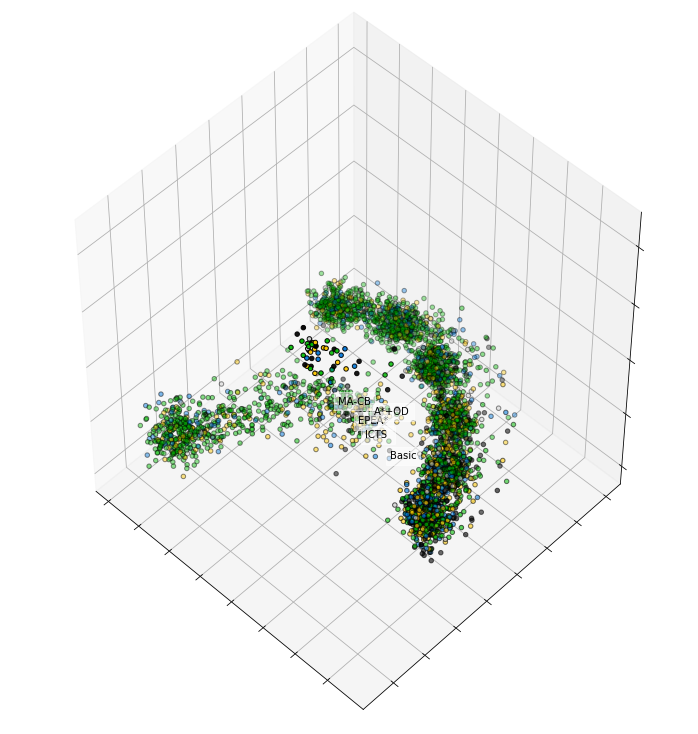

In [56]:
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition


features_cols = ['GridSize', 'NumOfObstacles',
            'AvgDistanceToGoal', 'MaxDistanceToGoal', 'MinDistanceToGoal', 'AvgStartDistances', 'AvgGoalDistances',
            'NumOfAgents', 'ObstacleDensity', 'PointsAtSPRatio', 'Sparsity']


X = X_train[embedding_cols]
X = StandardScaler().fit_transform(X)

y = y_train.values

fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

targets = only_alg_runtime_cols
import matplotlib.cm as cm

# colors = cm.rainbow(np.linspace(0, 1, len(targets)))
colors = []
for label, name in enumerate(targets):
    ax.text3D(X[y == name, 0].mean(),
              X[y == name, 1].mean() + 1.5,
              X[y == name, 2].mean(),
              name[:5],
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = [replace_label_with_int(label) for label in y]
y = np.choose(y, [1, 2, 3, 4, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

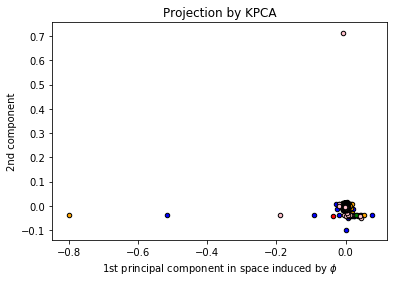

In [57]:
from sklearn.decomposition import PCA, KernelPCA

features_cols = [
    'GridSize', 'NumOfObstacles',
            'AvgDistanceToGoal', 'MaxDistanceToGoal', 'MinDistanceToGoal', 'AvgStartDistances', 'AvgGoalDistances',
            'NumOfAgents', 'ObstacleDensity', 'PointsAtSPRatio',
                 'Sparsity']


X = X_train[embedding_cols]
X = StandardScaler().fit_transform(X)

y = y_train.values.transpose()

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)


X_kpca = kpca.fit_transform(X)
y = [replace_label_with_int(label) for label in y]
y = np.array(y)
reds = y == 0
blues = y == 1
oranges = y == 2
greens = y == 3
pinks = y == 4

# plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.scatter(X_kpca[oranges, 0], X_kpca[oranges, 1], c="orange",
            s=20, edgecolor='k')
plt.scatter(X_kpca[greens, 0], X_kpca[greens, 1], c="green",
            s=20, edgecolor='k')
plt.scatter(X_kpca[pinks, 0], X_kpca[pinks, 1], c="pink",
            s=20, edgecolor='k')

# y = np.choose(y, [1, 2, 3, 4, 0]).astype(np.float)
# plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, edgecolor='k')

plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.show()

## Graph2Vec experiments

In [251]:
graph2vec_df = pd.read_csv('nci1.csv')
# graph2vec_df = graph2vec_df[graph2vec_df.type.str.contains('Instance')]

In [223]:
feature_cols = ['x_'+str(i) for i in range(32)]

In [224]:
# graph_features = graph2vec_df[feature_cols]

In [255]:
def obstacle_ratio_to_num(ratio, rows):
#     print(ratio, rows)
    if(ratio==0):
        return 0
    return int((rows*rows)*(ratio/100))

def label_for_grid(grid, column='Y'):
#     print(grid)
    if 'Instance' in grid:
        instance_details = grid.split('-')
        gridsize = instance_details[1]
        obstacle_ratio = instance_details[2]
        num_agents = instance_details[3]
        instance_id = instance_details[4].split('.')[0]

        orig_filename =grid
    #     print(gridsize, obstacle_ratio, num_agents, instance_id, grid)

        label = df[(df.NumOfAgents==int(num_agents)) & 
                   (df.InstanceId == int(instance_id)) &
                    (df.GridRows == int(gridsize)) &
                   (df.NumOfObstacles == obstacle_ratio_to_num(int(obstacle_ratio), int(gridsize)))][column].values[0]
    else:
        instance_details = grid.split('-')
        grid_name = '-'.join(instance_details[:-2])
        num_agents = instance_details[-2]
        instance_id = instance_details[-1].split('.')[0]

        orig_filename =grid
#         print(grid_name, num_agents, instance_id, grid)

        label = df[(df.NumOfAgents==int(num_agents)) & 
                   (df.InstanceId == int(instance_id)) &
                   (df.GridName == grid_name)][column].values[0]
    return label

In [256]:
for col in ['Y'] + alg_runtime_cols:
    graph2vec_df[col] = graph2vec_df['type'].apply(lambda x: label_for_grid(x,col))

In [257]:
import xgboost as xgb
from scipy import stats
from sklearn.model_selection import StratifiedKFold,cross_val_score, RandomizedSearchCV, GridSearchCV

from sklearn.model_selection import train_test_split

xg_cls = xgb.XGBClassifier(objective = 'multi:softmax')

X_train, X_test, y_train, y_test = train_test_split(graph2vec_df, graph2vec_df['Y'],
                                                    test_size=0.25,
                                                   )



In [268]:
param_dist = {'n_estimators': stats.randint(50, 1000),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3,4,5],
              'colsample_bytree': stats.uniform(0.5, 0.45),
              'min_child_weight': [1, 2, 3],
              "gamma" : [
                  0.01, 0.1, 1.5],
              "reg_alpha": [0, 0.5, 1],
             }

clf = RandomizedSearchCV(xg_cls, 
                         param_distributions = param_dist,
                         cv = 2,
                         n_iter = 2, 
#                          scoring = kappa,
                         error_score = 0,
                         verbose = 3,
                         n_jobs = -1)

clf.fit(X_train[feature_cols], y_train,
#         sample_weight=train_samples_weight
       )

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   32.9s finished


RandomizedSearchCV(cv=2, error_score=0,
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8375925715496264, gamma=4,
       learning_rate=0.06997350333606947, max_delta_step=0, max_depth=3,
       min_child_weight=3, missing=None, n_estimators=280, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7967351198692461),
          fit_params=None, iid='warn', n_iter=2, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F5B4684F28>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F5B46848D0>, 'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F5B46A6128>, 'max_depth': [3, 4, 5], 'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F5B46A6E48>, 'min_child

In [269]:
from sklearn.metrics import accuracy_score

def coverage_score(df, preds, max_runtime=300000):
    solved = 0
    for pred, (index, row) in zip(preds,df.iterrows()):
        if(row[pred] < max_runtime):
              solved += 1
    return solved/len(df)

def cumsum_score(df, preds):
    cumsum = 0
    for pred, (index, row) in zip(preds,df.iterrows()):
        cumsum += row[pred]
    return cumsum/((60*(10**3)))


xg_cls = clf.best_estimator_
train_preds = xg_cls.predict(X_train[feature_cols])
test_preds = xg_cls.predict(X_test[feature_cols])
print("Train acc:",accuracy_score(y_train, train_preds))
print("Test acc:",accuracy_score(y_test, test_preds))

print("Train coverage:", coverage_score(X_train, train_preds))
print("Test coverage:", coverage_score(X_test, test_preds))

print("Train cumsum:", cumsum_score(X_train, train_preds))
print("Test cumsum:", cumsum_score(X_test, test_preds))

Train acc: 0.7583408476104598
Test acc: 0.5234234234234234
Train coverage: 0.785692816351067
Test coverage: 0.7
Train cumsum: 3994.153904461677
Test cumsum: 1786.5492953233365


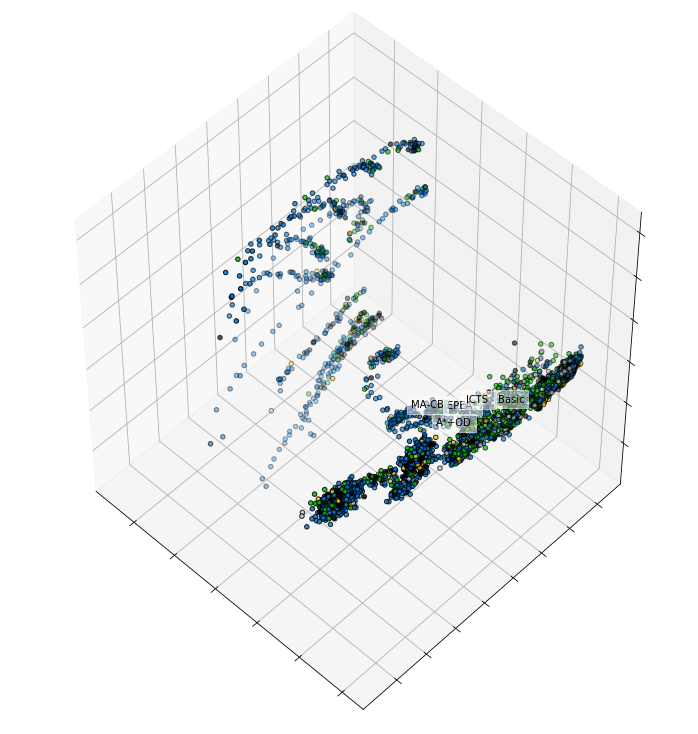

In [232]:
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

def replace_label_with_int(x):
    return {
        'EPEA*+ID Runtime': 0,
        'MA-CBS-Global-10/(EPEA*/SIC) choosing the first conflict in CBS nodes Runtime':1,
        'ICTS 3E +ID Runtime':2,
        'A*+OD+ID Runtime':3,
        'Basic-CBS/(A*/SIC)+ID Runtime':4
    }[x]



X = graph_features
# X = StandardScaler().fit_transform(X)

y = graph2vec_df['Y']

fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

targets = only_alg_runtime_cols
import matplotlib.cm as cm

# colors = cm.rainbow(np.linspace(0, 1, len(targets)))
colors = []
for label, name in enumerate(targets):
    ax.text3D(X[y == name, 0].mean(),
              X[y == name, 1].mean(),
              X[y == name, 2].mean(),
              name[:5],
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = [replace_label_with_int(label) for label in y]
# y = np.choose(y, [1, 2, 3, 4, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

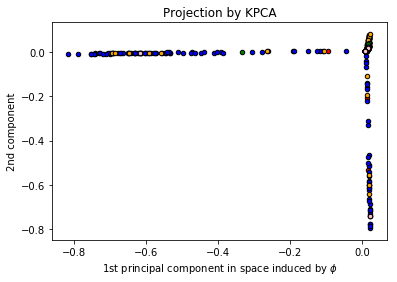

In [169]:
from sklearn.decomposition import PCA, KernelPCA

features_cols = [
    'GridSize', 'NumOfObstacles',
            'AvgDistanceToGoal', 'MaxDistanceToGoal', 'MinDistanceToGoal', 'AvgStartDistances', 'AvgGoalDistances',
            'NumOfAgents', 'ObstacleDensity', 'PointsAtSPRatio',
                 'Sparsity']


X = graph_features
# X = StandardScaler().fit_transform(X)

y = graph2vec_df['Y']
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)


X_kpca = kpca.fit_transform(X)
y = [replace_label_with_int(label) for label in y]
y = np.array(y)
reds = y == 0
blues = y == 1
oranges = y == 2
greens = y == 3
pinks = y == 4

# plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.scatter(X_kpca[oranges, 0], X_kpca[oranges, 1], c="orange",
            s=20, edgecolor='k')
plt.scatter(X_kpca[greens, 0], X_kpca[greens, 1], c="green",
            s=20, edgecolor='k')
plt.scatter(X_kpca[pinks, 0], X_kpca[pinks, 1], c="pink",
            s=20, edgecolor='k')

# y = np.choose(y, [1, 2, 3, 4, 0]).astype(np.float)
# plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, edgecolor='k')

plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.show()